**Goal: The presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4.**

1.  (age)
2. (sex) sex (1 = male; 0 = female)
3.  (cp)<br>
        Value 1: typical angina<br>
        Value 2: atypical angina<br>
        Value 3: non-anginal pain<br>
        Value 4: asymptomatic<br>
4. (trestbps):  resting blood pressure (in mm Hg on admission to the hospital)
5.  (chol): serum cholestoral in mg/dl
6.  (fbs): fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7.  (restecg)<br>
        Value 0: normal<br>
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
8.  (thalach):  maximum heart rate achieved
9.  (exang): exercise induced angina (1 = yes; 0 = no)
10.  (oldpeak): ST depression induced by exercise relative to rest
11.  (slope)<br>
        Value 1: upsloping<br>
        Value 2: flat<br>
        Value 3: downsloping<br>
12.  (ca): number of major vessels (0-3) colored by flourosopy
13.  (thal):  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (num) (the predicted attribute): presence of heart disease in the patient. It is integer valued from 0 (no presence) to           4

In [648]:
import pandas as pd

In [649]:
import csv
with open('processed.cleveland.data') as input_file:
    lines = input_file.readlines()
    newLines = []
    for line in lines:
        newLine = line.strip().split()
        newLines.append(newLine)
#print(newLines)
with open('heart_data.csv', 'w') as output:
    file_writer = csv.writer(output)
    file_writer.writerows(newLines,)
    

In [650]:
df = pd.read_csv('heart_data.csv', header = None,delimiter=',')
df

,0
0,"63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3..."
1,"67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5..."
2,"67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6..."
3,"37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5..."
4,"41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4..."
...,...
298,"45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2..."
299,"68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4..."
300,"57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2..."
301,"57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0..."


In [306]:
#df = pd.concat([df[0].str.split(',', expand=True)], axis=1)

<center><h1>Data Cleaning</h1></center>

In [651]:
df = df[0].str.split(',', expand=True)

In [652]:
df = df.rename(columns={0:'Age',1:'sex',2:'cp',3:'trestbps',4:'chol',5:'fbs',6 :'restecg',7:'thalach',8:'exang',9:'oldpeak',10:'slope',11:'ca',12:'thal',13:'num'})

In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       303 non-null    object
 1   sex       303 non-null    object
 2   cp        303 non-null    object
 3   trestbps  303 non-null    object
 4   chol      303 non-null    object
 5   fbs       303 non-null    object
 6   restecg   303 non-null    object
 7   thalach   303 non-null    object
 8   exang     303 non-null    object
 9   oldpeak   303 non-null    object
 10  slope     303 non-null    object
 11  ca        303 non-null    object
 12  thal      303 non-null    object
 13  num       303 non-null    object
dtypes: object(14)
memory usage: 33.3+ KB


In [654]:
data = df.copy()

In [655]:
data = data.loc[data['ca'] != '?']

In [656]:
data = data.loc[data['thal'] != '?']

In [146]:
# # for i in df.columns:
# #     if df[i].astype == 'object':
# #         df[i].astype = df[i].astype('float64')
# data = data.astype('float64')

In [657]:
df = df.rename(columns={
        'cp':'chest_pain_type', 
        'trtbps':'resting_blood_pressure',
        'chol':'cholesterol',
        'fbs':'fasting_blood_sugar',
        'restecg':'resting_electrocardiographic',
        'thalachh':'maximum_heart_rate',
        'exang':'exercise_induced_angina',
        'oldpeak':'ST_depression',
        'slope':'slope_peak_exercise_ST',
        'ca':'number_of_major_vessels',
        'thal':'thalium_stress_test',
        'num':'output'})

In [658]:
df.head()

,Age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar,resting_electrocardiographic,thalach,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thalium_stress_test,output
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [659]:
df.columns

Index(['Age', 'sex', 'chest_pain_type', 'trestbps', 'cholesterol',
       'fasting_blood_sugar', 'resting_electrocardiographic', 'thalach',
       'exercise_induced_angina', 'ST_depression', 'slope_peak_exercise_ST',
       'number_of_major_vessels', 'thalium_stress_test', 'output'],
      dtype='object')

In [660]:
data.rename(columns={
        'cp':'chest_pain_type', 
        'trtbps':'resting_blood_pressure',
        'chol':'cholesterol',
        'fbs':'fasting_blood_sugar',
        'restecg':'resting_electrocardiographic',
        'thalachh':'maximum_heart_rate',
        'exang':'exercise_induced_angina',
        'oldpeak':'ST_depression',
        'slope':'slope_peak_exercise_ST',
        'ca':'number_of_major_vessels',
        'thal':'thalium_stress_test',
        'num':'output'},
        inplace=True)

print(data.columns.tolist())

['Age', 'sex', 'chest_pain_type', 'trestbps', 'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiographic', 'thalach', 'exercise_induced_angina', 'ST_depression', 'slope_peak_exercise_ST', 'number_of_major_vessels', 'thalium_stress_test', 'output']


In [661]:
data = data.astype('float64')

In [662]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           297 non-null    float64
 1   sex                           297 non-null    float64
 2   chest_pain_type               297 non-null    float64
 3   trestbps                      297 non-null    float64
 4   cholesterol                   297 non-null    float64
 5   fasting_blood_sugar           297 non-null    float64
 6   resting_electrocardiographic  297 non-null    float64
 7   thalach                       297 non-null    float64
 8   exercise_induced_angina       297 non-null    float64
 9   ST_depression                 297 non-null    float64
 10  slope_peak_exercise_ST        297 non-null    float64
 11  number_of_major_vessels       297 non-null    float64
 12  thalium_stress_test           297 non-null    float64
 13  outpu

In [663]:
data['fasting_blood_sugar'].value_counts()

0.0    254
1.0     43
Name: fasting_blood_sugar, dtype: int64

In [664]:
data['sex'] = data.sex.map({0:'female',1:'male'})
#data['sex'] = np.where(data['sex'] == 0, 'female', 'male')
data['chest_pain_type'] = data['chest_pain_type'].map({
        1.0:'typical angina', 2.0:'atypical angina',
        3.0:'non-anginal',    4.0:'asymptomatic'})
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].map({
        0:'> 120 mg/dl', 1:'< 120 mg/dl'})
data['resting_electrocardiographic'] = data['resting_electrocardiographic'].map({
        0.0:'normal', 1.0:'ST-T wave abnormality', 2.0:'ventricular hypertrophy'})
data['exercise_induced_angina'] = np.where(data['exercise_induced_angina']==0 ,'no','yes')
data['slope_peak_exercise_ST'] = data['slope_peak_exercise_ST'].map({
        1.0:'upsloping', 2.0:'flat', 3.0:'downsloping'})
data['thalium_stress_test'] = data['thalium_stress_test'].map({
        3.0:'normal',
        6.0:'fixed defect', 7.0:'reversable defect'})

<IPython.core.display.Javascript object>

In [665]:
data.head()

,Age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar,resting_electrocardiographic,thalach,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thalium_stress_test,output
0,63.0,male,typical angina,145.0,233.0,< 120 mg/dl,ventricular hypertrophy,150.0,no,2.3,downsloping,0.0,fixed defect,0.0
1,67.0,male,asymptomatic,160.0,286.0,> 120 mg/dl,ventricular hypertrophy,108.0,yes,1.5,flat,3.0,normal,2.0
2,67.0,male,asymptomatic,120.0,229.0,> 120 mg/dl,ventricular hypertrophy,129.0,yes,2.6,flat,2.0,reversable defect,1.0
3,37.0,male,non-anginal,130.0,250.0,> 120 mg/dl,normal,187.0,no,3.5,downsloping,0.0,normal,0.0
4,41.0,female,atypical angina,130.0,204.0,> 120 mg/dl,ventricular hypertrophy,172.0,no,1.4,upsloping,0.0,normal,0.0


In [666]:
data['output'] = df['output']

In [667]:
data['output'] = data['output'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           297 non-null    float64
 1   sex                           297 non-null    object 
 2   chest_pain_type               297 non-null    object 
 3   trestbps                      297 non-null    float64
 4   cholesterol                   297 non-null    float64
 5   fasting_blood_sugar           297 non-null    object 
 6   resting_electrocardiographic  297 non-null    object 
 7   thalach                       297 non-null    float64
 8   exercise_induced_angina       297 non-null    object 
 9   ST_depression                 297 non-null    float64
 10  slope_peak_exercise_ST        297 non-null    object 
 11  number_of_major_vessels       297 non-null    float64
 12  thalium_stress_test           297 non-null    object 
 13  outpu

In [669]:
data['output'] = data['output'].map({0:'disease',1:'no disease',2:'no disease',3:'no disease'})

In [670]:
data.head()

,Age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar,resting_electrocardiographic,thalach,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thalium_stress_test,output
0,63.0,male,typical angina,145.0,233.0,< 120 mg/dl,ventricular hypertrophy,150.0,no,2.3,downsloping,0.0,fixed defect,disease
1,67.0,male,asymptomatic,160.0,286.0,> 120 mg/dl,ventricular hypertrophy,108.0,yes,1.5,flat,3.0,normal,no disease
2,67.0,male,asymptomatic,120.0,229.0,> 120 mg/dl,ventricular hypertrophy,129.0,yes,2.6,flat,2.0,reversable defect,no disease
3,37.0,male,non-anginal,130.0,250.0,> 120 mg/dl,normal,187.0,no,3.5,downsloping,0.0,normal,disease
4,41.0,female,atypical angina,130.0,204.0,> 120 mg/dl,ventricular hypertrophy,172.0,no,1.4,upsloping,0.0,normal,disease


In [672]:
data['output'].value_counts()

disease       160
no disease    124
Name: output, dtype: int64

In [673]:
df_cont = df[['Age', 'trestbps','thalach','ST_depression','number_of_major_vessels']]

In [674]:
df_cat = df_cat[['sex','chest_pain_type','fasting_blood_sugar','resting_electrocardiographic','exercise_induced_angina','slope_peak_exercise_ST','thalium_stress_test']]

In [ ]:
y = df['output']

<center><h1>EDA</h1></center>

The minimum age is 29.0
The minimum age is 77.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

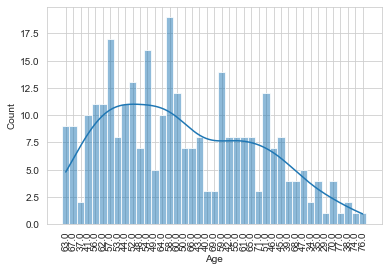

In [675]:
print(f'The minimum age is {data["Age"].min()}')
print(f'The minimum age is {data["Age"].max()}')
sns.histplot(df['Age'], kde = True)
plt.xticks(rotation = 90)
plt.show()

In [676]:
data.head()

,Age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar,resting_electrocardiographic,thalach,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thalium_stress_test,output
0,63.0,male,typical angina,145.0,233.0,< 120 mg/dl,ventricular hypertrophy,150.0,no,2.3,downsloping,0.0,fixed defect,disease
1,67.0,male,asymptomatic,160.0,286.0,> 120 mg/dl,ventricular hypertrophy,108.0,yes,1.5,flat,3.0,normal,no disease
2,67.0,male,asymptomatic,120.0,229.0,> 120 mg/dl,ventricular hypertrophy,129.0,yes,2.6,flat,2.0,reversable defect,no disease
3,37.0,male,non-anginal,130.0,250.0,> 120 mg/dl,normal,187.0,no,3.5,downsloping,0.0,normal,disease
4,41.0,female,atypical angina,130.0,204.0,> 120 mg/dl,ventricular hypertrophy,172.0,no,1.4,upsloping,0.0,normal,disease


1. **Let's see how each independent variable is correlated or distributed with the target variable.**
2. **Univariate and Bivariate analysis has to be done to understand more about the data**

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='cholesterol'>

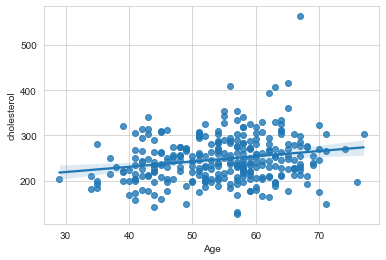

In [677]:
sns.regplot(x= 'Age', y= 'cholesterol', data= data)

There is an upward trend as suggested by the regression line. It indicates that as the age increases the cholestrol level also increases

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

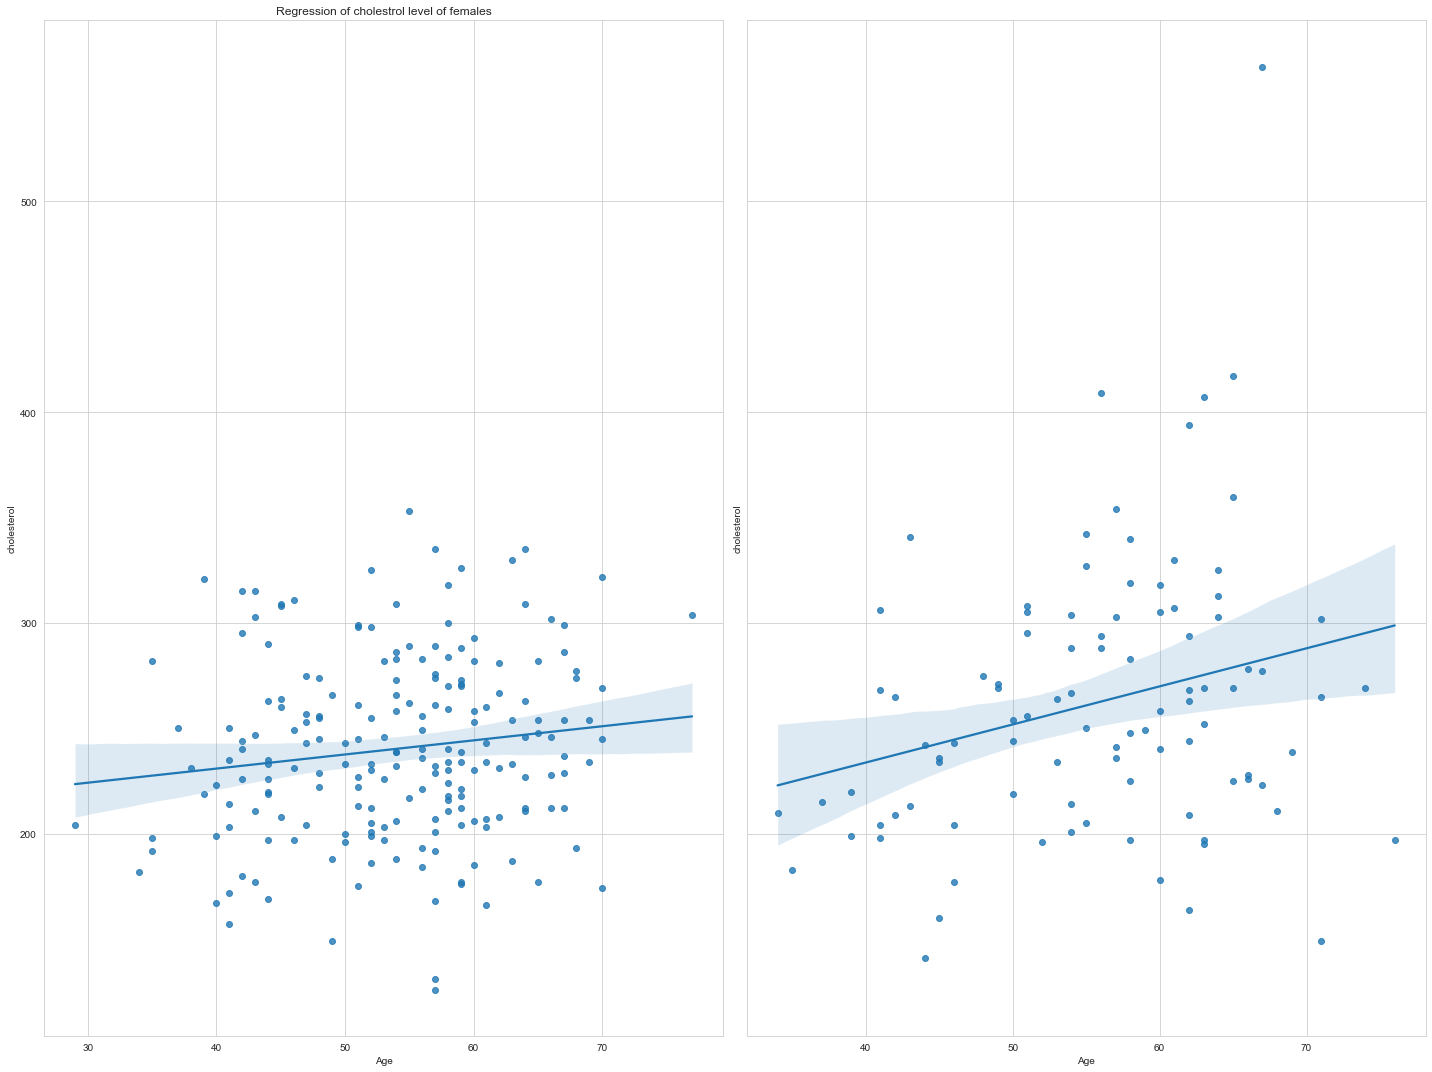

In [678]:
sns.set_style('whitegrid')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,15),sharey = True)
data_m = data.loc[data['sex'] == 'male']
sns.regplot(x= 'Age', y= 'cholesterol', data= data_m,ax=ax1)
data_fm = data.loc[data['sex'] == 'female']
sns.regplot(x= 'Age', y= 'cholesterol', data= data_fm,ax=ax2)
ax1.title.set_text('Regression of cholestrol level of males')
ax1.set_title('Regression of cholestrol level of females')
plt.tight_layout()

Females incre, males dec

In [679]:
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['output'] = data['output'].astype('object')

In [680]:
data.head()

,Age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar,resting_electrocardiographic,thalach,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thalium_stress_test,output
0,63.0,male,typical angina,145.0,233.0,< 120 mg/dl,ventricular hypertrophy,150.0,no,2.3,downsloping,0.0,fixed defect,disease
1,67.0,male,asymptomatic,160.0,286.0,> 120 mg/dl,ventricular hypertrophy,108.0,yes,1.5,flat,3.0,normal,no disease
2,67.0,male,asymptomatic,120.0,229.0,> 120 mg/dl,ventricular hypertrophy,129.0,yes,2.6,flat,2.0,reversable defect,no disease
3,37.0,male,non-anginal,130.0,250.0,> 120 mg/dl,normal,187.0,no,3.5,downsloping,0.0,normal,disease
4,41.0,female,atypical angina,130.0,204.0,> 120 mg/dl,ventricular hypertrophy,172.0,no,1.4,upsloping,0.0,normal,disease


In [681]:
data['output'] = data['output'].astype('float64')

ValueError: could not convert string to float: 'disease'

In [682]:
data.head()

,Age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar,resting_electrocardiographic,thalach,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thalium_stress_test,output
0,63.0,male,typical angina,145.0,233.0,< 120 mg/dl,ventricular hypertrophy,150.0,no,2.3,downsloping,0.0,fixed defect,disease
1,67.0,male,asymptomatic,160.0,286.0,> 120 mg/dl,ventricular hypertrophy,108.0,yes,1.5,flat,3.0,normal,no disease
2,67.0,male,asymptomatic,120.0,229.0,> 120 mg/dl,ventricular hypertrophy,129.0,yes,2.6,flat,2.0,reversable defect,no disease
3,37.0,male,non-anginal,130.0,250.0,> 120 mg/dl,normal,187.0,no,3.5,downsloping,0.0,normal,disease
4,41.0,female,atypical angina,130.0,204.0,> 120 mg/dl,ventricular hypertrophy,172.0,no,1.4,upsloping,0.0,normal,disease


<IPython.core.display.Javascript object>

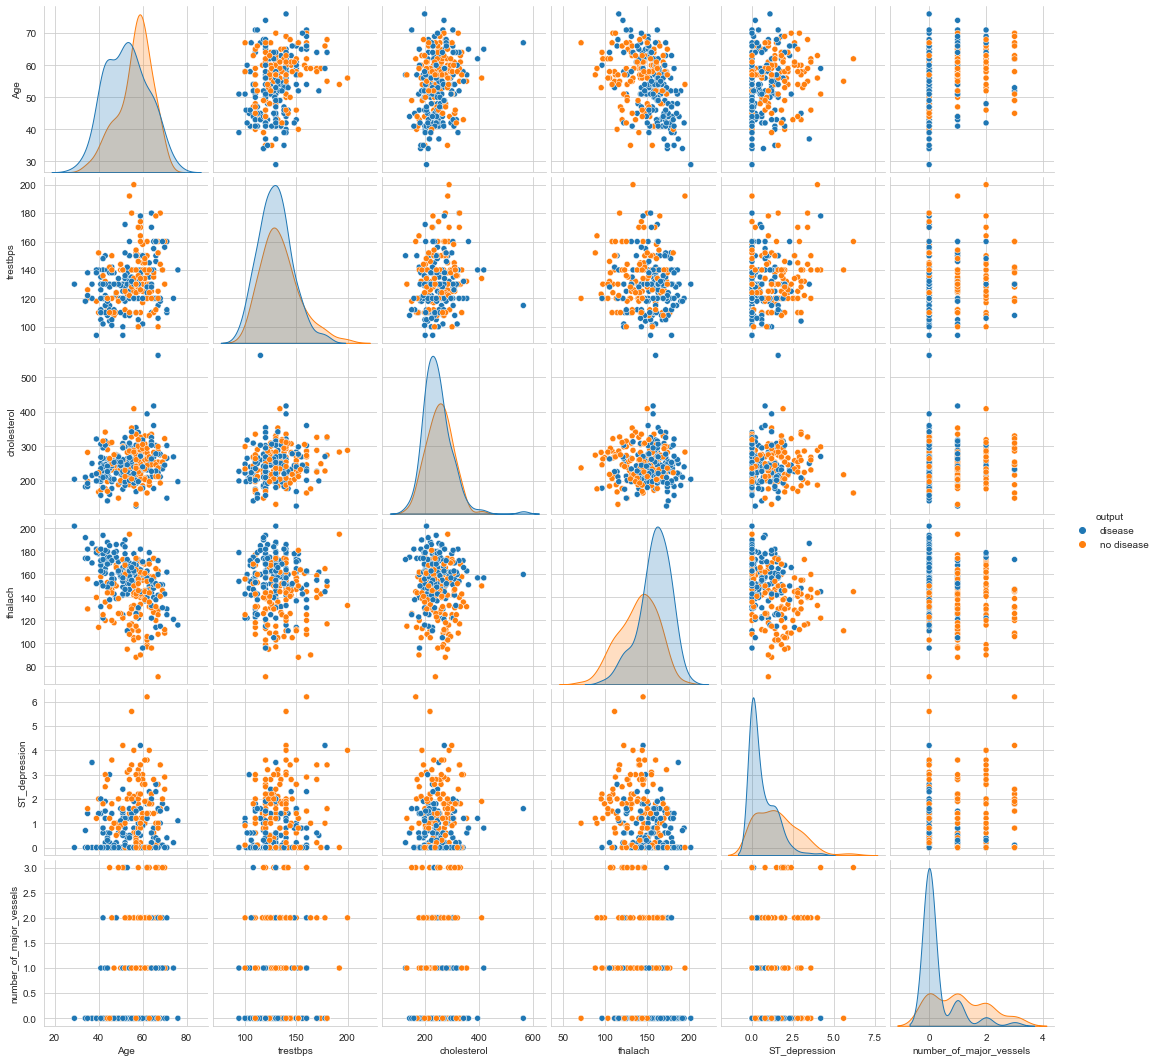

In [684]:
sns.pairplot(data = data,hue = 'output')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

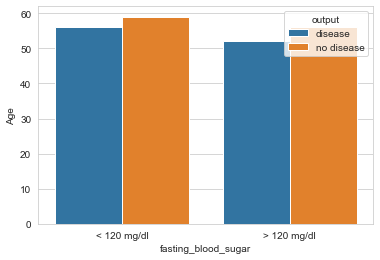

In [685]:
sns.barplot(y='Age',x='fasting_blood_sugar',hue='output',data = data,ci=None)
plt.show()

for the people having blood sugar levels less than < 120mg/dl are prone to disease than the other people

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

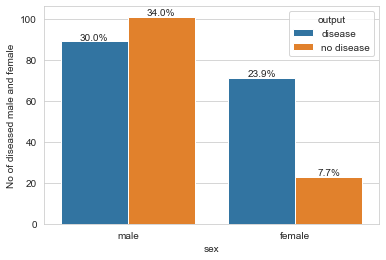

In [686]:
ax = sns.countplot(data = data, x = 'sex', hue = 'output')
for p in ax.patches:
    ax.annotate("{:,.1f}%".format(p.get_height()*100/len(data)), (p.get_x() + p.get_width()/2, p.get_height()+2), ha='center', va='center')
plt.ylabel('No of diseased male and female')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

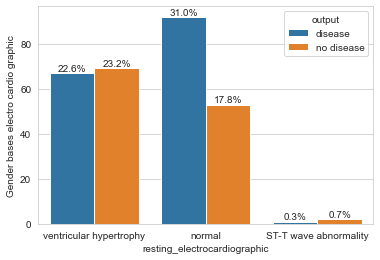

In [687]:
ax = sns.countplot(data = data, x = 'resting_electrocardiographic', hue = 'output')
for p in ax.patches:
    ax.annotate("{:,.1f}%".format(p.get_height()*100/len(data)), (p.get_x() + p.get_width()/2, p.get_height()+2), ha='center', va='center')
plt.ylabel('Gender bases electro cardio graphic')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

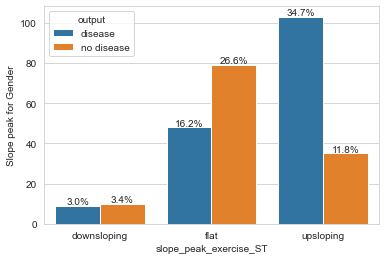

In [688]:
ax = sns.countplot(data = data, x = 'slope_peak_exercise_ST', hue = 'output')
for p in ax.patches:
    ax.annotate("{:,.1f}%".format(p.get_height()*100/len(data)), (p.get_x() + p.get_width()/2, p.get_height()+2), ha='center', va='center')
plt.ylabel('Slope peak for Gender')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

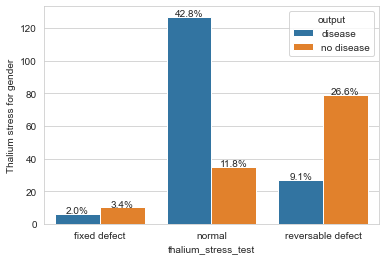

In [689]:
ax = sns.countplot(data = data, x = 'thalium_stress_test', hue = 'output')
for p in ax.patches:
    ax.annotate("{:,.1f}%".format(p.get_height()*100/len(data)), (p.get_x() + p.get_width()/2, p.get_height()+2), ha='center', va='center')
plt.ylabel('Thalium stress for gender')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

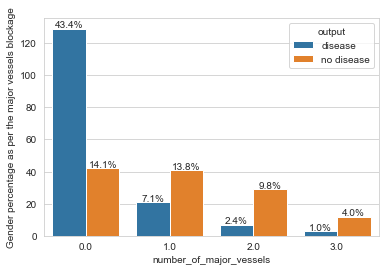

In [690]:
ax = sns.countplot(data = data, x = 'number_of_major_vessels', hue = 'output')
for p in ax.patches:
    ax.annotate("{:,.1f}%".format(p.get_height()*100/len(data)), (p.get_x() + p.get_width()/2, p.get_height()+2), ha='center', va='center')
plt.ylabel('Gender percentage as per the major vessels blockage')
plt.show()

In [691]:
data.select_dtypes('float64').columns

Index(['Age', 'trestbps', 'cholesterol', 'thalach', 'ST_depression',
       'number_of_major_vessels'],
      dtype='object')

In [692]:
data.head(2)

,Age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar,resting_electrocardiographic,thalach,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thalium_stress_test,output
0,63.0,male,typical angina,145.0,233.0,< 120 mg/dl,ventricular hypertrophy,150.0,no,2.3,downsloping,0.0,fixed defect,disease
1,67.0,male,asymptomatic,160.0,286.0,> 120 mg/dl,ventricular hypertrophy,108.0,yes,1.5,flat,3.0,normal,no disease


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

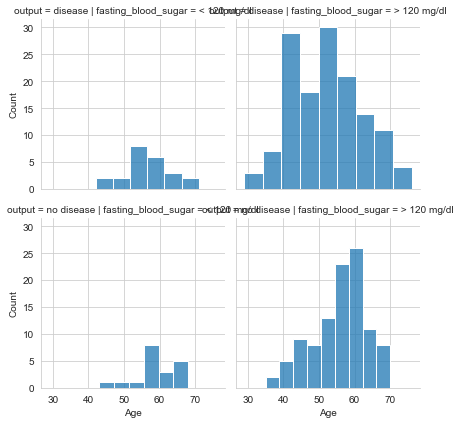

In [693]:
sns.FacetGrid(data,col='fasting_blood_sugar',row ='output').map(sns.histplot,'Age')
plt.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

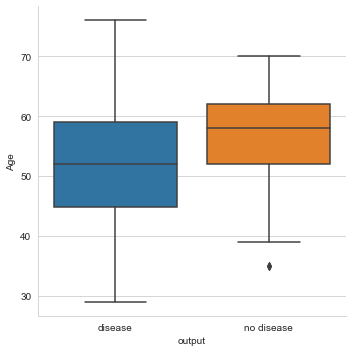

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

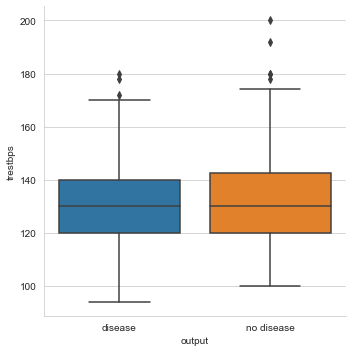

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

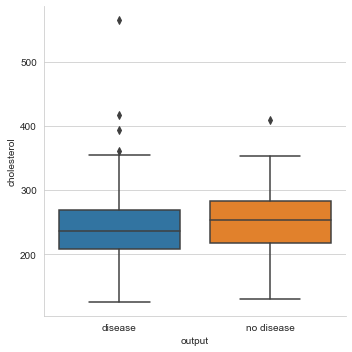

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

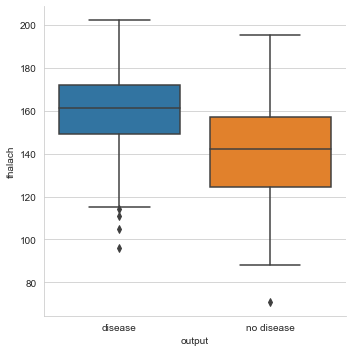

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

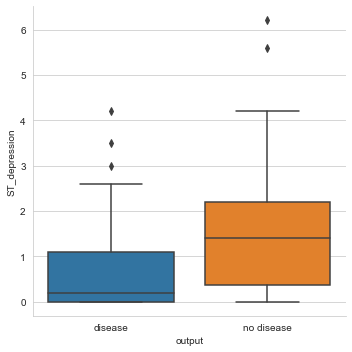

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

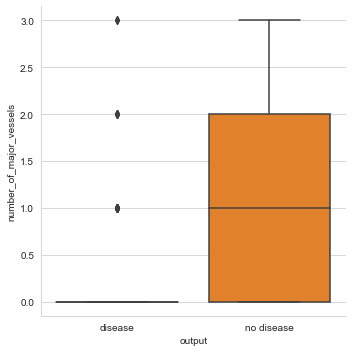

In [694]:
for i in data.select_dtypes('float64').columns:
    sns.catplot(y=i,x='output',data=data,kind = 'box',ci=None)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

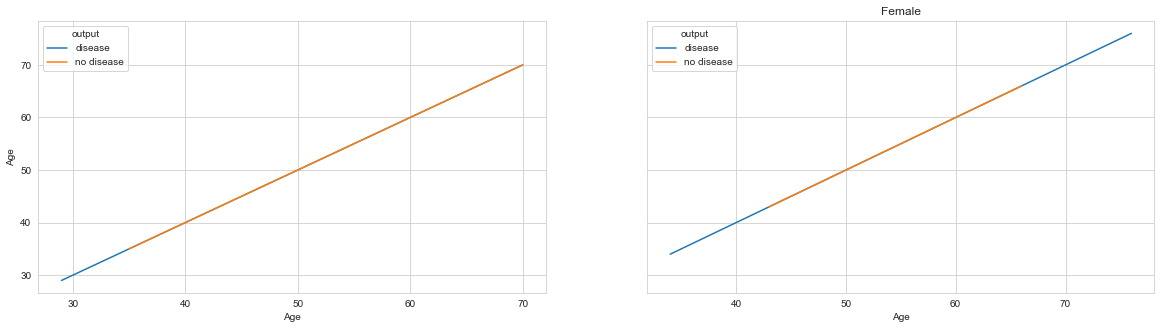

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

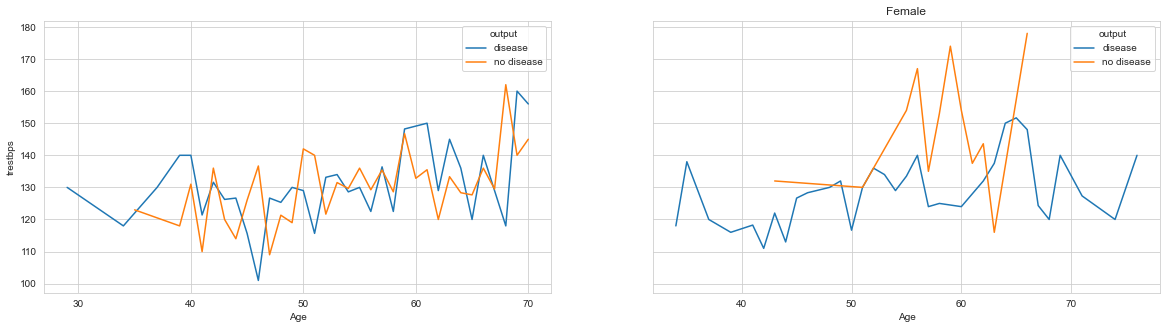

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

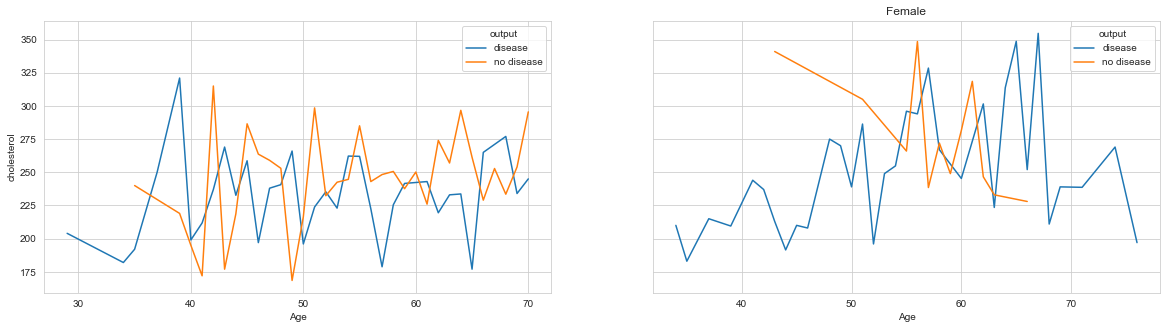

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

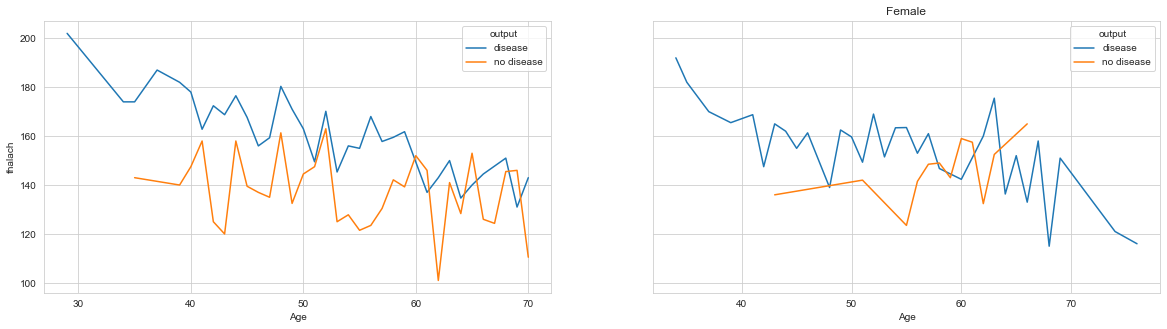

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

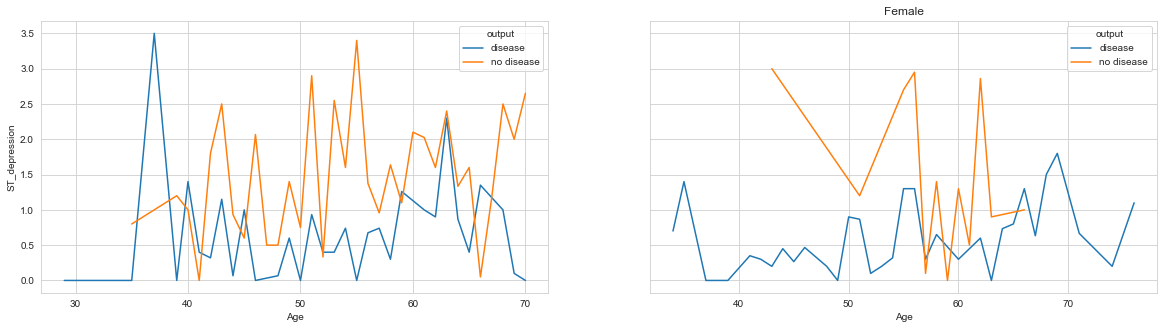

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

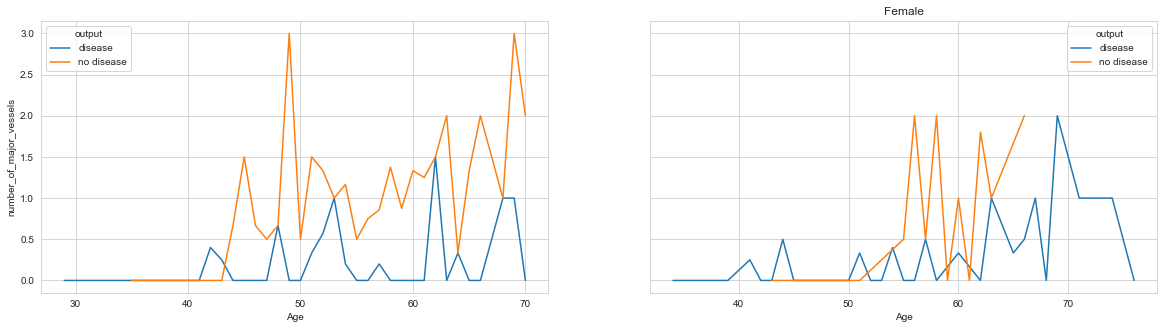

In [695]:
for i in data.select_dtypes('float64').columns:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5),sharey = True)
    plt.title('Male')
    sns.lineplot(y=i,x='Age',hue='output',data=data_m,ci=None,ax=ax1)
    plt.title('Female')
    sns.lineplot(y=i,x='Age',hue='output',data=data_fm,ci=None,ax=ax2)
    plt.show()    

In [699]:
data.groupby(['sex','fasting_blood_sugar','resting_electrocardiographic','exercise_induced_angina','slope_peak_exercise_ST','output'])[['cholesterol','thalach','trestbps','number_of_major_vessels']].median()

cholesterol  \
sex    fasting_blood_sugar resting_electrocardiographic exercise_induced_angina slope_peak_exercise_ST output                    
female < 120 mg/dl         normal                       no                      flat                   no disease        294.0   
                                                                                upsloping              disease           241.0   
                                                        yes                     flat                   no disease        228.0   
                           ventricular hypertrophy      no                      upsloping              disease           283.0   
                                                                                                       no disease        319.0   
                                                        yes                     downsloping            no disease        288.0   
                                                                                flat                   no disease        283.0   
                                                                                upsloping              disease           288.0   
       > 120 mg/dl         ST-T wave abnormality        no                      flat                   disease           197.0   
                                                        yes                     flat                   no disease        266.0   
                           normal                       no                      downsloping            disease           226.0   
                                                                                flat                   disease           213.5   
                                                                                                       no disease        263.0   
                                                                                upsloping              disease           240.0   
                                                        yes                     flat                   no disease        246.5   
                                                                                upsloping              disease           339.5   
                           ventricular hypertrophy      no                      downsloping            no disease        216.0   
                                                                                flat                   disease           264.0   
                                                                                                       no disease        247.0   
                                                                                upsloping              disease           261.5   
                                                                                                       no disease        317.5   
                                                        yes                     downsloping            disease           177.0   
                                                                                flat                   disease           239.5   
                                                                                                       no disease        358.0   
                                                                                upsloping              disease           268.5   
male   < 120 mg/dl         normal                       no                      downsloping            disease           240.0   
                                                                                flat                   disease           298.0   
                                                                                                       no disease        218.0   
                                                                                upsloping              disease           205.0   
                                                        yes                     flat 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

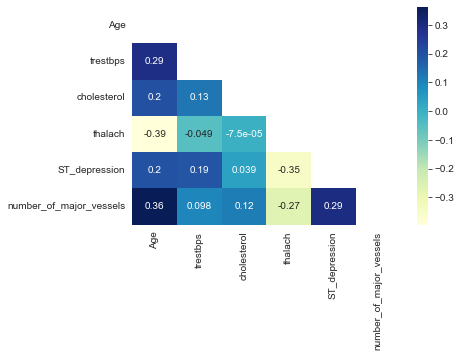

In [700]:
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr(), annot=True,cmap="YlGnBu",mask=mask)
plt.show()

<center><h1>Feature engineering</h1></center>

In [714]:
data_cont = data[['Age', 'trestbps','thalach','ST_depression','number_of_major_vessels']]
data_cat = data[['sex','chest_pain_type','fasting_blood_sugar','resting_electrocardiographic','exercise_induced_angina','slope_peak_exercise_ST','thalium_stress_test']]
y=data['output']

KeyError: "None of [Index(['sex', 'chest_pain_type', 'fasting_blood_sugar',\n       'resting_electrocardiographic', 'exercise_induced_angina',\n       'slope_peak_exercise_ST', 'thalium_stress_test'],\n      dtype='object')] are in the [columns]"

In [703]:
(data["output"].value_counts()/len(data['output']))*100

disease       53.872054
no disease    41.750842
Name: output, dtype: float64

In [704]:
data_cat = pd.get_dummies(data_cat,drop_first=True)

In [705]:
data1 = pd.concat([data_cont,data_cat],axis=1)

In [706]:
data = data1.copy()

In [715]:
data.head()

,Age,trestbps,thalach,ST_depression,number_of_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_normal,resting_electrocardiographic_ventricular hypertrophy,exercise_induced_angina_yes,slope_peak_exercise_ST_flat,slope_peak_exercise_ST_upsloping,thalium_stress_test_normal,thalium_stress_test_reversable defect
0,63.0,145.0,150.0,2.3,0.0,1,0,0,1,0,0,1,0,0,0,0,0
1,67.0,160.0,108.0,1.5,3.0,1,0,0,0,1,0,1,1,1,0,1,0
2,67.0,120.0,129.0,2.6,2.0,1,0,0,0,1,0,1,1,1,0,0,1
3,37.0,130.0,187.0,3.5,0.0,1,0,1,0,1,1,0,0,0,0,1,0
4,41.0,130.0,172.0,1.4,0.0,0,1,0,0,1,0,1,0,0,1,1,0


In [608]:
#data = data1.copy()
df['output'] = df['output'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [713]:
y = y.map({'disease':0,'no disease':1})

In [712]:
y.dtype

dtype('O')

In [609]:
y=df['output']

In [708]:
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(data,['Age', 'trestbps', 'thalach', 'ST_depression','number_of_major_vessels'])

,VIF,Tolerance
Age,1.408194,0.710129
trestbps,1.133774,0.882010
thalach,1.328979,0.752457
ST_depression,1.235505,0.809386
number_of_major_vessels,1.233297,0.810835


In [709]:
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(data,data_cat.columns)

,VIF,Tolerance
sex_male,1.242718,0.804688
chest_pain_type_atypical angina,1.416190,0.706120
chest_pain_type_non-anginal,1.448321,0.690455
chest_pain_type_typical angina,1.165329,0.858127
fasting_blood_sugar_> 120 mg/dl,1.058613,0.944632
resting_electrocardiographic_normal,19.964431,0.050089
resting_electrocardiographic_ventricular hypertrophy,19.838181,0.050408
exercise_induced_angina_yes,1.357548,0.736622
slope_peak_exercise_ST_flat,4.150424,0.240939
slope_peak_exercise_ST_upsloping,4.392797,0.227645


In [710]:
calculate_vif(data,data_cont.columns)

,VIF,Tolerance
Age,1.408194,0.710129
trestbps,1.133774,0.882010
thalach,1.328979,0.752457
ST_depression,1.235505,0.809386
number_of_major_vessels,1.233297,0.810835


In [758]:
y = pd.DataFrame(y)

In [763]:
y = y['output']

In [764]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=True,shuffle=True)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(207, 17) (90, 17) (207,) (90,)


In [816]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [770]:
pip install xgboost


  Using cached xgboost-1.7.1-py3-none-win_amd64.whl (89.1 MB)


In [771]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

**Baseline scores:
disease       53.872054
no disease    41.750842**

In [774]:
lg = LogisticRegression()
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()
adbc = AdaBoostClassifier()
knn = KNeighborsClassifier()
xgbc = xgb.XGBClassifier(learning_rate=0.01)
sv = SVC()
accuracy_models= []
models = [lg,dt,rfc,adbc,knn,sv,xgbc]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"Confusion matrix of the model {model}")
    cnf_matrix = confusion_matrix(y_test,y_pred)
    print(cnf_matrix)
    print(classification_report(y_test, y_pred))
    print(f"Accuracy of the model {model}")
    acc = accuracy_score(y_pred,y_test)
    print(acc)
    accuracy_models.append(acc)
    print('-----------***********--------------')

Confusion matrix of the model LogisticRegression()
[[44  9]
 [10 27]]
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82        53
         1.0       0.75      0.73      0.74        37

    accuracy                           0.79        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90

Accuracy of the model LogisticRegression()
0.7888888888888889
-----------***********--------------
Confusion matrix of the model DecisionTreeClassifier()
[[40 13]
 [14 23]]
              precision    recall  f1-score   support

         0.0       0.74      0.75      0.75        53
         1.0       0.64      0.62      0.63        37

    accuracy                           0.70        90
   macro avg       0.69      0.69      0.69        90
weighted avg       0.70      0.70      0.70        90

Accuracy of the model DecisionTreeClassifier()
0.7
-----------***********--------------
Confusion matri

Goal is to decrease the false negatives which suggests that we need to achieve a high recall score

For LogisticRegression

In [787]:
from sklearn.model_selection import cross_val_score,GridSearchCV
pram_grid =[{'penalty': ['l2','elasticnet'],
   'multi_class' : ['auto', 'ovr'],
   'solver' : ['newton-cg', 'lbfgs', 'saga'],
   'max_iter':[100,500,100]}]
gd = GridSearchCV(estimator = lg,cv =5,param_grid=pram_grid,scoring='accuracy',n_jobs=-1,verbose=False)
gd.fit(X_train,y_train)
print(gd.best_params_)
print(gd.best_estimator_)

{'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(solver='newton-cg')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.77328688 0.77328688 0.77328688        nan        nan        nan
 0.77328688 0.77328688 0.77328688        nan        nan        nan
 0.77328688 0.77328688 0.77328688        nan        nan        nan
 0.77328688 0.77328688 0.77328688        nan        nan        nan
 0.77328688 0.77328688 0.77328688        nan        nan        nan
 0.77328688 0.77328688 0.77328688        nan        nan        nan]
  warnings.warn(


In [794]:
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
pram_grid =[{'penalty': ['l2','elasticnet'],
   'multi_class' : ['auto', 'ovr'],
   'solver' : ['newton-cg', 'lbfgs', 'saga'],
   'max_iter':[100,500,100]}]
rcv = RandomizedSearchCV(estimator = lg,cv =5,param_distributions=pram_grid,scoring='accuracy',n_jobs=-1,verbose=False)
rcv.fit(X_train,y_train)
print(f'The best parameters from the crossvalidation are {rcv.best_params_}')
print(f'The best estimator from the crossvalidation are {rcv.best_estimator_}')

The best parameters from the crossvalidation are {'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'max_iter': 100}
The best estimator from the crossvalidation are LogisticRegression(multi_class='ovr', solver='newton-cg')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.77328688        nan        nan 0.77328688        nan 0.77328688
        nan        nan 0.77328688 0.77328688]
  warnings.warn(


In [793]:
accuracy = cross_val_score(lg, X_train, y_train, scoring='accuracy', cv = 10)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 77.40476190476191


In [808]:
lg = LogisticRegression(max_iter = 100, multi_class='ovr', solver='newton-cg' , penalty='l2')
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
# classification_report(y_test, y_pred)

[[44 10]
 [ 9 27]]
0.7888888888888889


In [810]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82        53
         1.0       0.75      0.73      0.74        37

    accuracy                           0.79        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90



In [809]:
lg = LogisticRegression(max_iter = 100, multi_class = 'auto' , penalty='l2', solver='newton-cg')
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[44 10]
 [ 9 27]]
0.7888888888888889


In [801]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82        53
         1.0       0.75      0.73      0.74        37

    accuracy                           0.79        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90



There is no much difference between the orginal model and the tuned model. Pecentage has just increased a bit.

In [824]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
print(mean_acc)
print(np.round(np.max(mean_acc)*100),2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.73333333 0.7        0.74444444 0.76666667 0.8        0.78888889
 0.84444444 0.82222222 0.86666667 0.84444444 0.86666667 0.85555556
 0.86666667 0.82222222 0.83333333 0.81111111 0.85555556 0.78888889
 0.83333333 0.8       ]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

87.0 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

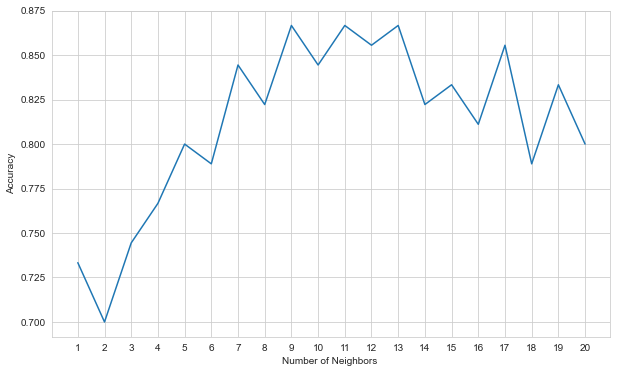

In [820]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

with k=9,10,11 the max accuracy is 87.02 lets use crossvalidation to find the best hyperparameters

In [828]:
estimator = knn
estimator.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [839]:
from sklearn.model_selection import cross_val_score,GridSearchCV
pram_grid =[{
   'algorithm' : ['auto','ball_tree', 'kd_tree', 'brute'],
   'leaf_size' : [30,100,10],
   'metric':['minkowski'],
   'n_neighbors': [10,12,1]}]
gd = GridSearchCV(estimator = knn,cv =5,param_grid=pram_grid,scoring='accuracy',n_jobs=-1,verbose=False)
gd.fit(X_train,y_train)
print(gd.best_params_)
print(gd.best_estimator_)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 10}
KNeighborsClassifier(n_neighbors=10)


In [851]:
knn = KNeighborsClassifier(algorithm = 'auto', leaf_size= 100, metric= 'minkowski', n_neighbors= 13)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[48  7]
 [ 5 30]]
0.8666666666666667


In [852]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89        53
         1.0       0.86      0.81      0.83        37

    accuracy                           0.87        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



In [855]:
model = SVC()
param_grid = { 'C':[0.1,1],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3],'gamma': [1, 0.01]}
grid = GridSearchCV(model,param_grid,scoring = 'accuracy',cv=5,return_train_score=True, n_jobs = -1)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
SVC(C=0.1, degree=1, gamma=1, kernel='poly')


In [875]:
svc = SVC(C=0.1, degree=1, gamma=1, kernel='poly')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[47 10]
 [ 6 27]]
0.8222222222222222


In [888]:
accuracy = cross_val_score(svc, X_train, y_train, scoring='accuracy', cv = 87)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 80.65134099616857


In [876]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85        53
         1.0       0.82      0.73      0.77        37

    accuracy                           0.82        90
   macro avg       0.82      0.81      0.81        90
weighted avg       0.82      0.82      0.82        90



In [889]:
model = RandomForestClassifier()
pg = [{'n_estimators':[100, 300, 500, 800, 1000],
       'max_depth':[10,30,5],
       'max_features':['auto','log2'],
       'max_leaf_nodes':[10,100,10],
       'criterion':['gini','entropy'],
       'bootstrap': [True, False]
      }]
grid = GridSearchCV(model,param_grid=pg,scoring = 'accuracy',cv=5,return_train_score=True, n_jobs = -1)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)
accuracy = cross_val_score(svc, X_train, y_train, scoring='accuracy', cv = 5)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 10, 'n_estimators': 800}
RandomForestClassifier(bootstrap=False, max_depth=5, max_leaf_nodes=10,
                       n_estimators=800)
Accuracy of Model with Cross Validation is: 80.70847851335655


In [887]:
model = RandomForestClassifier(max_depth=5, max_leaf_nodes=10,criterion='gini',n_estimators=100,)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[44 13]
 [ 9 24]]
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80        57
         1.0       0.65      0.73      0.69        33

    accuracy                           0.76        90
   macro avg       0.74      0.75      0.74        90
weighted avg       0.76      0.76      0.76        90

0.7555555555555555


**Key Observations:**